Paso 1: Importación de Librerías
Primero, importamos todas las librerías necesarias para el análisis y modelado.

In [28]:
# Importación de Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score


Paso 2: Cargar el Dataset
Definimos una función para cargar el conjunto de datos de diabetes y convertirlo en un DataFrame de Pandas.


In [3]:
# Cargar el dataset
def load_data():
    diabetes = load_diabetes(as_frame=True)  # Cargar el dataset como un DataFrame
    df = diabetes.frame  # Convertirlo en un DataFrame de Pandas
    return df

df = load_data()  # Llamar a la función para cargar los datos

Paso 3: Exploración y Limpieza de Datos
3.1 Verificar la Estructura del DataFrame
Imprimimos las columnas del DataFrame para entender su estructura.

In [4]:
# Verificar las columnas del DataFrame
print("Columnas del DataFrame:")
print(df.columns)

Columnas del DataFrame:
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')


3.2 Identificar Valores Nulos y Duplicados
Verificamos si hay valores nulos o duplicados en el DataFrame.

In [5]:
# Identificar valores nulos
print("Valores nulos en cada columna:")
print(df.isnull().sum())

# Identificar duplicados
print("Número de duplicados:", df.duplicated().sum())

Valores nulos en cada columna:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64
Número de duplicados: 0


3.3 Corregir o Eliminar Datos Problemáticos
Si encontramos valores nulos o duplicados, podemos decidir eliminarlos o corregirlos. En este caso, asumimos que no hay valores nulos ni duplicados.

In [6]:
# Eliminar duplicados si los hay
df = df.drop_duplicates()

3.4 Generar un Resumen Inicial con Visualizaciones Clave
Podemos visualizar la distribución de la variable objetivo y algunas características.

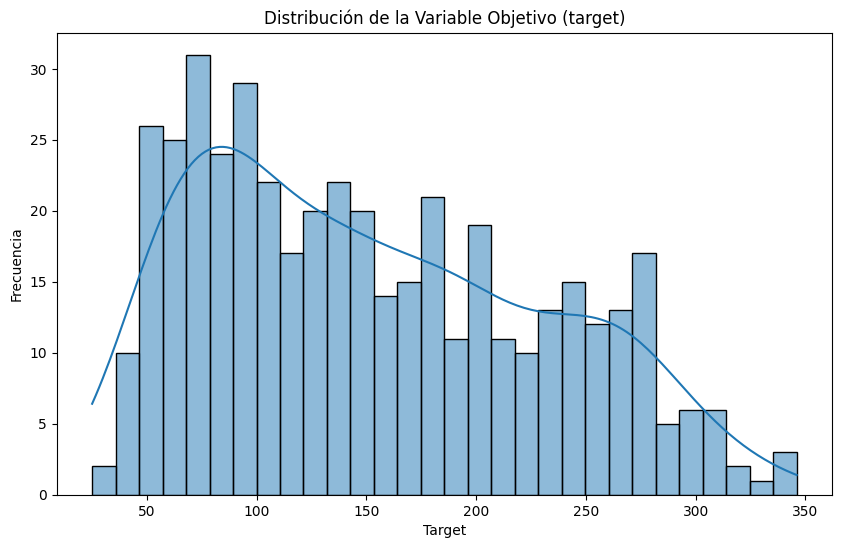

In [7]:
# Visualizar la distribución de la variable objetivo
plt.figure(figsize=(10, 6))
sns.histplot(df['target'], bins=30, kde=True)
plt.title('Distribución de la Variable Objetivo (target)')
plt.xlabel('Target')
plt.ylabel('Frecuencia')
plt.show()

#### Paso 4: Preprocesamiento (Pipeline I)
4.1 Definir las Transformaciones para los Datos
Definimos las transformaciones necesarias para las características numéricas.

In [8]:
# Dividir los datos en características y objetivo
X = df.drop(columns=['target'])  # Características
y = df['target']  # Variable objetivo

# Verificar las columnas de X
print("Columnas de X:")
print(X.columns)

Columnas de X:
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


4.2 Normalización/Estandarización
Usamos StandardScaler para normalizar las características numéricas.

In [9]:
# Preprocesar los datos
def preprocess_data(X):
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Transformador para características numéricas
    numeric_transformer = StandardScaler()

    # Combinador de transformadores
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ]
    )
    
    return preprocessor

preprocessor = preprocess_data(X)  # Crear el preprocesador

#### Paso 5: Construcción del Modelo (Pipeline II)
5.1 Importar y Usar el Preprocessor
Construimos un Pipeline que incluye el preprocesador y el modelo.

In [10]:
# Definir los modelos a evaluar
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Linear Regression': LinearRegression()
}

# Evaluar cada modelo
for model_name, model in models.items():
    # Construir el pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Paso 1: Preprocesar los datos
        ('model', model)                 # Paso 2: Entrenar el modelo
    ])

5.2 Entrenar el Modelo con Validación Cruzada
Entrenamos el modelo y evaluamos su rendimiento usando validación cruzada.

In [11]:
# Evaluar cada modelo
for model_name, model in models.items():
    # **Inicio del Pipeline**
    # El Pipeline permite encadenar el preprocesamiento de datos y el modelo en un solo objeto.
    # Esto asegura que el preprocesamiento se aplique de manera consistente antes de entrenar el modelo.
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Paso 1: Preprocesar los datos
        ('model', model)                 # Paso 2: Entrenar el modelo
    ])
    # **Fin del Pipeline**
    
    # Entrenar el modelo con validación cruzada
    try:
        cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
        cv_rmse = np.sqrt(-cv_scores)
        print(f"{model_name} - RMSE de validación cruzada: {cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}")
    except ValueError as e:
        print(f"Error durante la validación cruzada para {model_name}: {e}")

Random Forest - RMSE de validación cruzada: 57.94 ± 2.61
Linear Regression - RMSE de validación cruzada: 54.69 ± 1.37


#### Evaluar el modelo en el conjunto completo

Linear Regression - RMSE de validación cruzada: 54.69 ± 1.37
Linear Regression - MSE de validación cruzada: 2993.08 ± 150.77
Linear Regression - R²: 0.52
Linear Regression - MSE: 2859.70


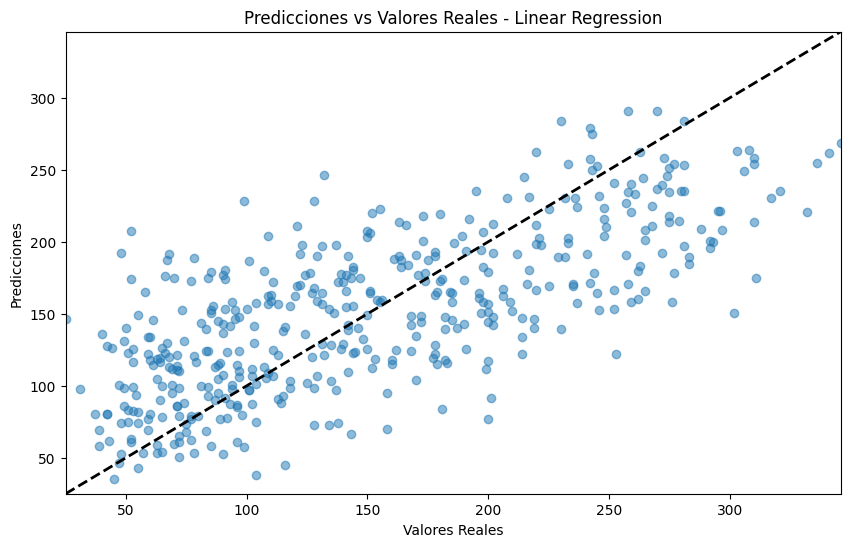

In [12]:

    # Entrenar el modelo con validación cruzada
    try:
        cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
        cv_rmse = np.sqrt(-cv_scores)  # Calcular RMSE a partir de los scores negativos
        cv_mse = -cv_scores  # MSE es el negativo de los scores
        print(f"{model_name} - RMSE de validación cruzada: {cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}")
        print(f"{model_name} - MSE de validación cruzada: {cv_mse.mean():.2f} ± {cv_mse.std():.2f}")

        # Evaluar el modelo en el conjunto completo
        pipeline.fit(X, y)  # Entrenar el modelo en todo el conjunto de datos
        predictions = pipeline.predict(X)  # Hacer predicciones

        # Calcular R² y MSE
        r2 = r2_score(y, predictions)
        mse = mean_squared_error(y, predictions)

        print(f"{model_name} - R²: {r2:.2f}")
        print(f"{model_name} - MSE: {mse:.2f}")

        # Visualizar las predicciones frente a los valores reales
        plt.figure(figsize=(10, 6))
        plt.scatter(y, predictions, alpha=0.5)
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Línea de referencia
        plt.title(f'Predicciones vs Valores Reales - {model_name}')
        plt.xlabel('Valores Reales')
        plt.ylabel('Predicciones')
        plt.xlim(y.min(), y.max())
        plt.ylim(y.min(), y.max())
        plt.show()

    except Exception as e:
        print(f"Error durante la validación cruzada para {model_name}: {e}")

#### Evaluar cada modelo

Random Forest - RMSE de validación cruzada: 57.94 ± 2.61
Random Forest - MSE de validación cruzada: 3363.26 ± 302.23
Random Forest - R²: 0.92
Random Forest - MSE: 476.75


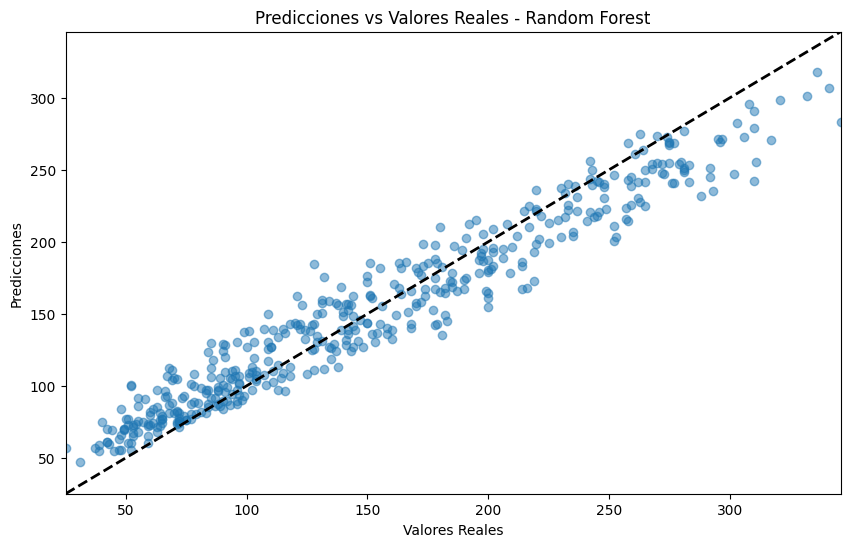

Linear Regression - RMSE de validación cruzada: 54.69 ± 1.37
Linear Regression - MSE de validación cruzada: 2993.08 ± 150.77
Linear Regression - R²: 0.52
Linear Regression - MSE: 2859.70


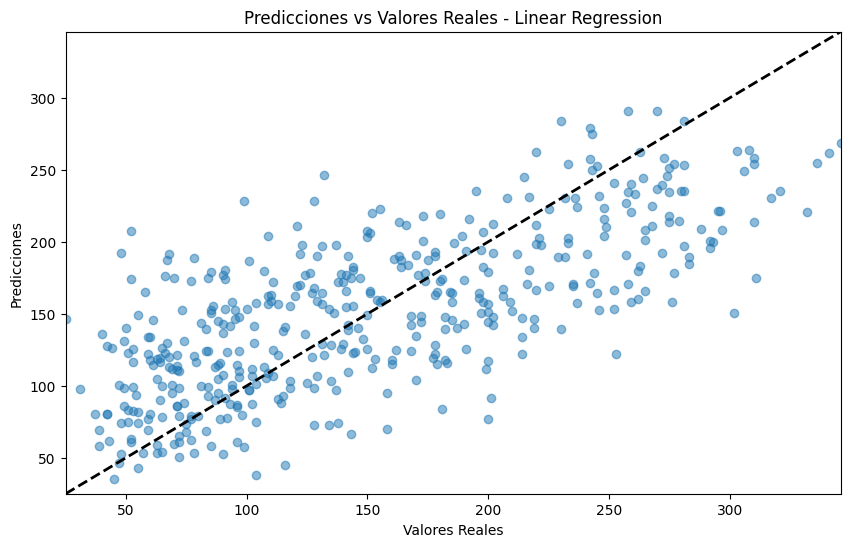

In [13]:

for model_name, model in models.items():
    # Construir el pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Paso 1: Preprocesar los datos
        ('model', model)                 # Paso 2: Entrenar el modelo
    ])
 # Entrenar el modelo con validación cruzada
    try:
        cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
        cv_rmse = np.sqrt(-cv_scores)  # Calcular RMSE a partir de los scores negativos
        cv_mse = -cv_scores  # MSE es el negativo de los scores
        print(f"{model_name} - RMSE de validación cruzada: {cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}")
        print(f"{model_name} - MSE de validación cruzada: {cv_mse.mean():.2f} ± {cv_mse.std():.2f}")

        # Evaluar el modelo en el conjunto completo
        pipeline.fit(X, y)  # Entrenar el modelo en todo el conjunto de datos
        predictions = pipeline.predict(X)  # Hacer predicciones

        # Calcular R² y MSE
        r2 = r2_score(y, predictions)
        mse = mean_squared_error(y, predictions)

        print(f"{model_name} - R²: {r2:.2f}")
        print(f"{model_name} - MSE: {mse:.2f}")

        # Visualizar las predicciones frente a los valores reales
        plt.figure(figsize=(10, 6))
        plt.scatter(y, predictions, alpha=0.5)
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Línea de referencia
        plt.title(f'Predicciones vs Valores Reales - {model_name}')
        plt.xlabel('Valores Reales')
        plt.ylabel('Predicciones')
        plt.xlim(y.min(), y.max())
        plt.ylim(y.min(), y.max())
        plt.show()

    except Exception as e:
        print(f"Error durante la validación cruzada para {model_name}: {e}")

Random Forest - RMSE de validación cruzada: 57.90 ± 2.42
Random Forest - MSE de validación cruzada: 3357.78 ± 281.81
Random Forest - R²: 0.92
Random Forest - MSE: 479.19
Linear Regression - RMSE de validación cruzada: 54.69 ± 1.37
Linear Regression - MSE de validación cruzada: 2993.08 ± 150.77
Linear Regression - R²: 0.52
Linear Regression - MSE: 2859.70


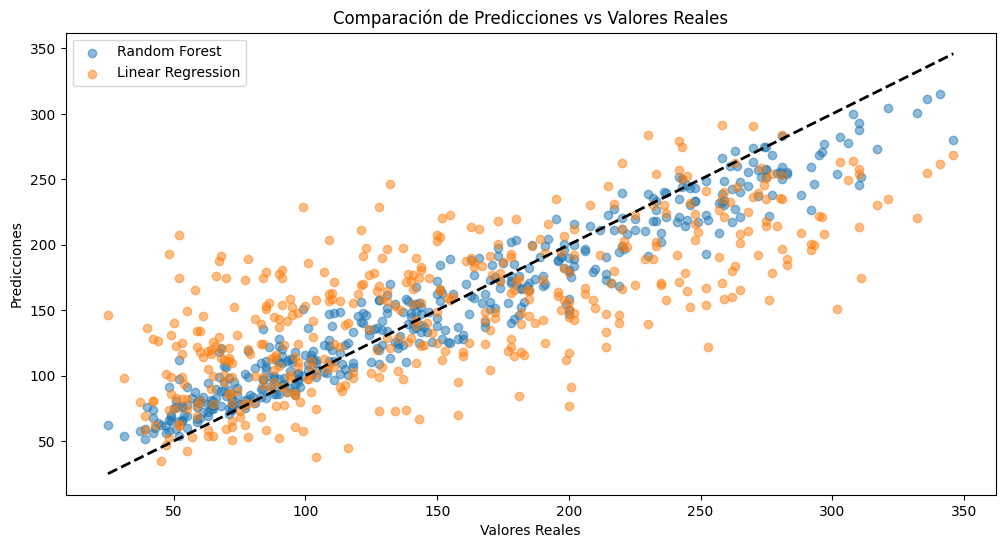


 Tabla Comparativa de Modelos:



,RMSE Validación,MSE Validación,R² Entrenamiento,MSE Entrenamiento,RMSE Entrenamiento
Random Forest,57.90 ± 2.42,3357.78 ± 281.81,0.92,479.19,21.89
Linear Regression,54.69 ± 1.37,2993.08 ± 150.77,0.52,2859.70,53.48


In [32]:


# Cargar datos
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

# Definir modelos
models = {
    "Random Forest": RandomForestRegressor(),
    "Linear Regression": LinearRegression()
}

# Definir preprocesador
preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), X.columns)], remainder="passthrough"
)

# Diccionario para almacenar métricas
model_results = {}

plt.figure(figsize=(12, 6))

for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    try:
        # Validación cruzada
        cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
        cv_rmse = np.sqrt(-cv_scores)
        cv_mse = -cv_scores

        # Entrenar el modelo
        pipeline.fit(X, y)
        predictions = pipeline.predict(X)

        # Calcular métricas
        r2 = r2_score(y, predictions)
        mse = mean_squared_error(y, predictions)
        rmse = np.sqrt(mse)

        model_results[model_name] = {
            "RMSE Validación": f"{cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}",
            "MSE Validación": f"{cv_mse.mean():.2f} ± {cv_mse.std():.2f}",
            "R² Entrenamiento": f"{r2:.2f}",
            "MSE Entrenamiento": f"{mse:.2f}",
            "RMSE Entrenamiento": f"{rmse:.2f}"
        }

        print(f"{model_name} - RMSE de validación cruzada: {cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}")
        print(f"{model_name} - MSE de validación cruzada: {cv_mse.mean():.2f} ± {cv_mse.std():.2f}")
        print(f"{model_name} - R²: {r2:.2f}")
        print(f"{model_name} - MSE: {mse:.2f}")

        # Graficar predicciones vs valores reales
        plt.scatter(y, predictions, alpha=0.5, label=f"{model_name}")

    except Exception as e:
        print(f" Error durante la validación cruzada para {model_name}: {e}")

# Gráfico comparativo
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title("Comparación de Predicciones vs Valores Reales")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.legend()
plt.show()

# Mostrar tabla comparativa
results_df = pd.DataFrame.from_dict(model_results, orient='index')
print("\n Tabla Comparativa de Modelos:\n")
display(results_df)  # Si usas Jupyter
# print(results_df)  # Si usas otro entorno


Definir los Hiperparámetros para GridSearchCV

In [15]:
# Paso 4: Definir Hiperparámetros para Cada Modelo
param_grids = {
    'Random Forest': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [3, 5, 7],
        'model__learning_rate': [0.01, 0.1, 0.2]
    }
}

In [16]:
pip install xgboost

In [17]:
pip install --upgrade xgboost scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [18]:
import xgboost as xgb
import sklearn

print("XGBoost version:", xgb.__version__)
print("scikit-learn version:", sklearn.__version__)

XGBoost version: 3.0.0
scikit-learn version: 1.6.1


In [19]:
pip install --upgrade xgboost


Note: you may need to restart the kernel to use updated packages.


 Implementar GridSearchCV

In [24]:


# Paso 2: Cargar y Preprocesar el Dataset
def load_data():
    diabetes = load_diabetes(as_frame=True)
    df = diabetes.frame
    return df

df = load_data()
X = df.drop(columns=['target'])
y = df['target']

def preprocess_data(X):
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    numeric_transformer = StandardScaler()
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ]
    )
    return preprocessor

preprocessor = preprocess_data(X)

# Paso 3: Definir el Pipeline
def create_pipeline(model):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

# Paso 4: Definir Hiperparámetros para Cada Modelo
param_grids = {
    'Random Forest': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [3, 5, 7],
        'model__learning_rate': [0.01, 0.1, 0.2]
    }
}

# Paso 5: Implementar GridSearchCV para Cada Modelo
for model_name, model in zip(param_grids.keys(), [RandomForestRegressor(random_state=42), XGBRegressor(random_state=42)]):
    print(f"Optimizando {model_name}...")
    
    # Crear el pipeline
    pipeline = create_pipeline(model)
    
    # Implementar GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    
    # Ajustar el modelo
    try:
        grid_search.fit(X, y)
        
        # Obtener los mejores hiperparámetros
        best_params = grid_search.best_params_
        print(f"{model_name} - Mejores hiperparámetros: {best_params}")

        # Hacer predicciones con el mejor modelo
        best_model = grid_search.best_estimator_
        predictions = best_model.predict(X)

        # Calcular métricas
        mse = mean_squared_error(y, predictions)
        r2 = r2_score(y, predictions)

        print(f"{model_name} - MSE del modelo optimizado: {mse:.2f}")
        print(f"{model_name} - R² del modelo optimizado: {r2:.2f}")
    
    except Exception as e:
        print(f"Error durante la optimización de {model_name}: {e}")

Optimizando Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Random Forest - Mejores hiperparámetros: {'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Random Forest - MSE del modelo optimizado: 1077.28
Random Forest - R² del modelo optimizado: 0.82
Optimizando XGBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
XGBoost - Mejores hiperparámetros: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 50}
XGBoost - MSE del modelo optimizado: 1718.65
XGBoost - R² del modelo optimizado: 0.71


In [21]:
# Definir los modelos y sus hiperparámetros
models = {
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [None, 10, 20, 30],
            'model__learning_rate': [2, 5, 10]
        }
    }
}

# Evaluar cada modelo con GridSearchCV
results = {}
for model_name, model_info in models.items():
    # Construir el pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model_info['model'])
    ])
    
    # Implementar GridSearchCV
    grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X, y)
    
    # Guardar los resultados
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': np.sqrt(-grid_search.best_score_)
    }

# Generar reportes y métricas finales
for model_name, metrics in results.items():
    print(f"{model_name} - Mejor Hiperparámetros: {metrics['best_params']}")
    print(f"{model_name} - RMSE de validación cruzada: {metrics['best_score']:.2f}")

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-1.58130346e+04 -1.58127917e+04 -1.58127903e+04 -1.64192180e+04
 -1.64192210e+04 -1.64192211e+04 -1.62978447e+04 -1.62978446e+04
 -1.62978444e+04 -1.62978447e+04 -1.62978446e+04 -1.62978444e+04
 -3.82702390e+61             nan             nan -1.23530389e+61
             nan             nan -5.29871327e+60             nan
             nan -5.30004543e+60             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan]
  warnings.warn(


Random Forest - Mejor Hiperparámetros: {'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Random Forest - RMSE de validación cruzada: 57.39
XGBoost - Mejor Hiperparámetros: {'model__learning_rate': 2, 'model__max_depth': None, 'model__n_estimators': 200}
XGBoost - RMSE de validación cruzada: 125.75


In [35]:

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,        # Pipeline completo
    param_grid=param_grid,      # Hiperparámetros a ajustar
    cv=5,                       # Validación cruzada de 5 folds
    scoring='neg_mean_squared_error',  # Métrica de evaluación
    verbose=1,                  # Nivel de detalle
    n_jobs=-1                   # Paralelización completa
)

# Ajustar el modelo con un manejo de errores
try:
    print(" Iniciando Grid Search...")
    grid_search.fit(X, y)
    
    # Obtener los mejores hiperparámetros
    best_params = grid_search.best_params_
    
    # Mostrar resultados en formato de tabla
    best_params_df = pd.DataFrame([best_params])
    print("\n Mejores hiperparámetros encontrados:")
    print(best_params_df)
    
except Exception as e:
    print(f" Error durante el ajuste de GridSearchCV: {e}")


 Iniciando Grid Search...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

 Mejores hiperparámetros encontrados:
   model__alpha
0           0.1


Optimizando Random Forest...
Columnas de X: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Random Forest - Mejores hiperparámetros: {'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Random Forest - MSE del modelo optimizado: 1077.28
Random Forest - R² del modelo optimizado: 0.82
Optimizando XGBoost...
Columnas de X: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Fitting 5 folds for each of 27 candidates, totalling 135 fits
XGBoost - Mejores hiperparámetros: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 50}
XGBoost - MSE del modelo optimizado: 1718.65
XGBoost - R² del modelo optimizado: 0.71
Optimizando Linear Regression...
Columnas de X: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Linear Regression - Mejores hiperparámetros: {'model__fit_intercept': True}
Linear Regression - MSE del modelo optimizado: 2859.70
Linear Regression - R² del modelo opt

C:\Users\hp\AppData\Local\Temp\ipykernel_13380\2452884507.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='MSE', data=results_df, palette='viridis')


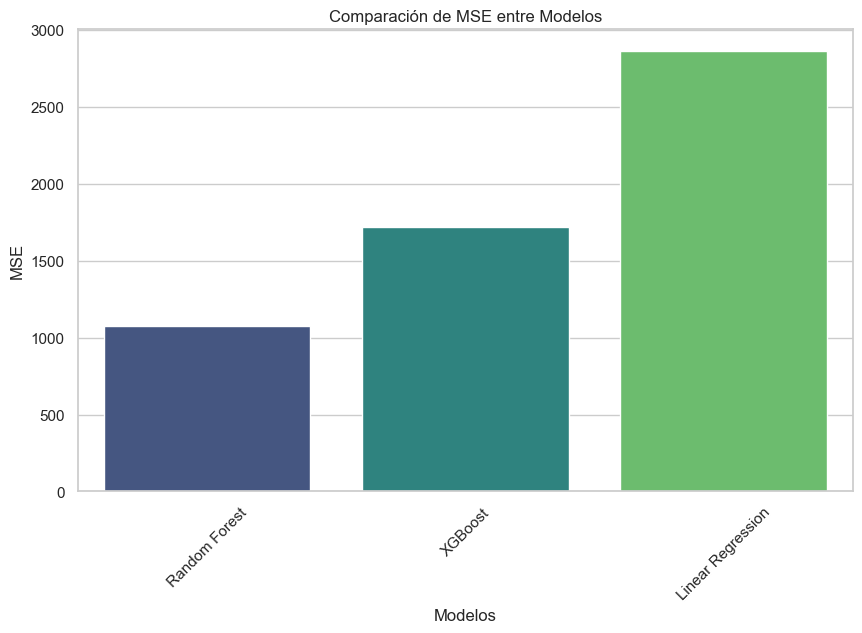

C:\Users\hp\AppData\Local\Temp\ipykernel_13380\2452884507.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='R²', data=results_df, palette='viridis')


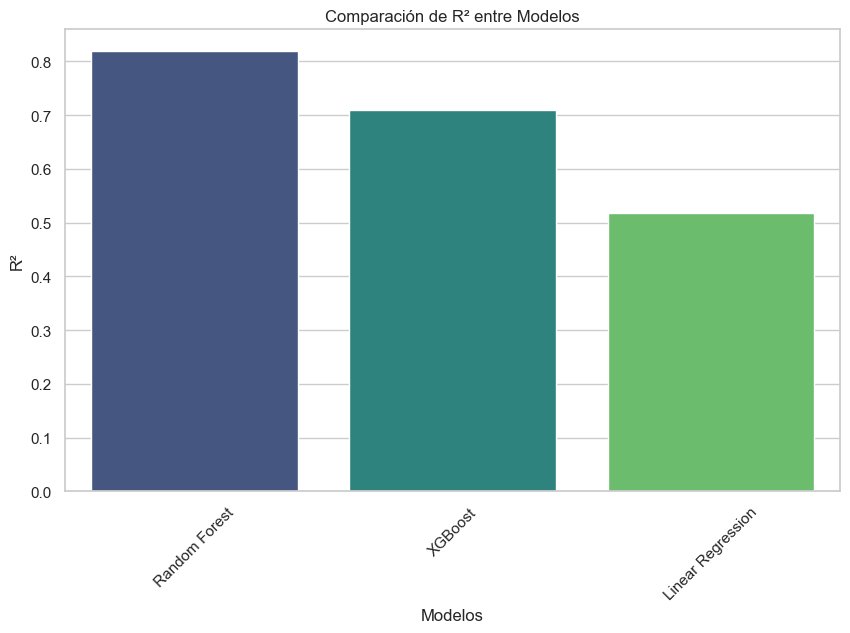


Conclusión:
El mejor modelo es Random Forest con un R² de 0.82 y un MSE de 1077.28.


In [52]:
# Paso 1: Definir el Pipeline
def create_pipeline(model):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

# Paso 2: Definir Hiperparámetros para Cada Modelo
param_grids = {
    'Random Forest': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [3, 5, 7],
        'model__learning_rate': [0.01, 0.1, 0.2]
    },
    'Linear Regression': {
        'model__fit_intercept': [True, False]
    }
}

# Paso 3: Implementar GridSearchCV para Cada Modelo
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'Linear Regression': LinearRegression()
}

results = {}
for model_name, model in models.items():
    print(f"Optimizando {model_name}...")
    
    # Crear el pipeline
    pipeline = create_pipeline(model)
    
    # Implementar GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    
    # Ajustar el modelo
    try:
        # Verificar las columnas de X
        print("Columnas de X:", X.columns.tolist())
        
        # Ajustar el modelo
        grid_search.fit(X, y)
        
        # Obtener los mejores hiperparámetros
        best_params = grid_search.best_params_
        print(f"{model_name} - Mejores hiperparámetros: {best_params}")

        # Hacer predicciones con el mejor modelo
        best_model = grid_search.best_estimator_
        predictions = best_model.predict(X)

        # Calcular métricas
        mse = mean_squared_error(y, predictions)
        r2 = r2_score(y, predictions)

        print(f"{model_name} - MSE del modelo optimizado: {mse:.2f}")
        print(f"{model_name} - R² del modelo optimizado: {r2:.2f}")
        
        # Guardar resultados
        results[model_name] = {
            'MSE': mse,
            'R²': r2
        }
    
    except Exception as e:
        print(f"Error durante la optimización de {model_name}: {e}")

# Paso 4: Comparar Resultados
print("\nComparación de Resultados:")
results_df = pd.DataFrame(results).T  # Transponer para mejor visualización
print(results_df)

# Verificar que el DataFrame no esté vacío
if not results_df.empty:
    # Paso 5: Visualizar Resultados
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Configurar el estilo de Seaborn
    sns.set(style="whitegrid")

    # Crear un gráfico de barras para comparar MSE
    plt.figure(figsize=(10, 6))
    sns.barplot(x=results_df.index, y='MSE', data=results_df, palette='viridis')
    plt.title('Comparación de MSE entre Modelos')
    plt.xlabel('Modelos')
    plt.ylabel('MSE')
    plt.xticks(rotation=45)
    plt.show()

    # Crear un gráfico de barras para comparar R²
    plt.figure(figsize=(10, 6))
    sns.barplot(x=results_df.index, y='R²', data=results_df, palette='viridis')
    plt.title('Comparación de R² entre Modelos')
    plt.xlabel('Modelos')
    plt.ylabel('R²')
    plt.xticks(rotation=45)
    plt.show()

    # Paso 6: Conclusión
    print("\nConclusión:")
    best_model = max(results, key=lambda x: results[x]['R²'])
    print(f"El mejor modelo es {best_model} con un R² de {results[best_model]['R²']:.2f} y un MSE de {results[best_model]['MSE']:.2f}.")
else:
    print("No se obtuvieron resultados para comparar.")


 Iniciando GridSearchCV para Random Forest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
 Mejores hiperparámetros para Random Forest: {'model__max_depth': None, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Random Forest - RMSE validación cruzada: 57.70 ± 2.19
Random Forest - MSE validación cruzada: 3333.55 ± 251.62
Random Forest - R² entrenamiento: 0.82
Random Forest - MSE entrenamiento: 1048.40

 Iniciando GridSearchCV para XGBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
 Mejores hiperparámetros para XGBoost: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 50}
XGBoost - RMSE validación cruzada: 57.69 ± 2.13
XGBoost - MSE validación cruzada: 3332.74 ± 243.88
XGBoost - R² entrenamiento: 0.71
XGBoost - MSE entrenamiento: 1718.65

 Iniciando GridSearchCV para Linear Regression...
Linear Regression - RMSE validación cruzada: 54.69 ± 1.37
Linear Regression - MSE validación cruzada: 2993.08 ± 150.77
Linea

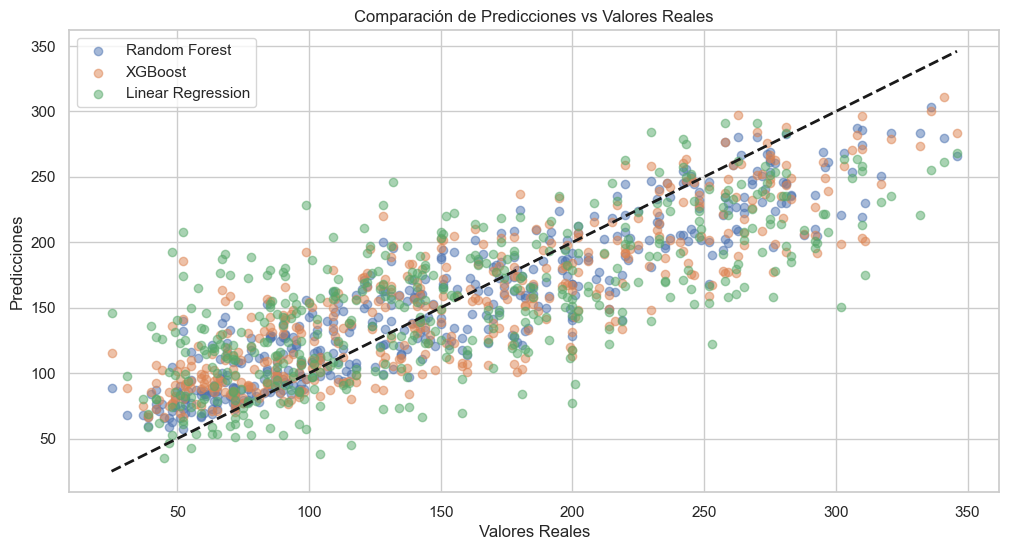


 Comparación Final de Modelos:


,RMSE Validación,MSE Validación,R² Entrenamiento,MSE Entrenamiento,RMSE Entrenamiento
Random Forest,57.70 ± 2.19,3333.55 ± 251.62,0.82,1048.40,32.38
XGBoost,57.69 ± 2.13,3332.74 ± 243.88,0.71,1718.65,41.46
Linear Regression,54.69 ± 1.37,2993.08 ± 150.77,0.52,2859.70,53.48


In [54]:


# Asegurar que X es un DataFrame con nombres de columna
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])

# Transformación de datos
preprocessor = ColumnTransformer([
    ("scaler", StandardScaler(), X.columns)
])

# Definir modelos y hiperparámetros
models = {
    "Random Forest": (RandomForestRegressor(), {
        "model__n_estimators": [50, 100, 200],
        "model__max_depth": [None, 10, 20],
        "model__min_samples_split": [2, 5, 10]
    }),
    "XGBoost": (XGBRegressor(), {
        "model__n_estimators": [50, 100, 200],
        "model__learning_rate": [0.01, 0.1, 0.3],
        "model__max_depth": [3, 6, 9]
    }),
    "Linear Regression": (LinearRegression(), {})  # No necesita hiperparámetros
}

best_models = {}
results = {}

plt.figure(figsize=(12, 6))

for model_name, (model, param_grid) in models.items():
    print(f"\n Iniciando GridSearchCV para {model_name}...")

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # GridSearchCV solo si hay hiperparámetros
    if param_grid:
        search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
        search.fit(X, y)
        best_model = search.best_estimator_
        best_params = search.best_params_
        print(f" Mejores hiperparámetros para {model_name}: {best_params}")
    else:
        pipeline.fit(X, y)
        best_model = pipeline

    best_models[model_name] = best_model

    # Validación cruzada
    cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)
    cv_mse = -cv_scores

    # Predicciones
    best_model.fit(X, y)
    predictions = best_model.predict(X)

    # Métricas
    r2 = r2_score(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)

    results[model_name] = {
        "RMSE Validación": f"{cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}",
        "MSE Validación": f"{cv_mse.mean():.2f} ± {cv_mse.std():.2f}",
        "R² Entrenamiento": f"{r2:.2f}",
        "MSE Entrenamiento": f"{mse:.2f}",
        "RMSE Entrenamiento": f"{rmse:.2f}"
    }

    print(f"{model_name} - RMSE validación cruzada: {cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}")
    print(f"{model_name} - MSE validación cruzada: {cv_mse.mean():.2f} ± {cv_mse.std():.2f}")
    print(f"{model_name} - R² entrenamiento: {r2:.2f}")
    print(f"{model_name} - MSE entrenamiento: {mse:.2f}")

    # Graficar predicciones vs valores reales
    plt.scatter(y, predictions, alpha=0.5, label=f"{model_name}")

# Comparación de modelos en una sola gráfica
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title("Comparación de Predicciones vs Valores Reales")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.legend()
plt.show()

# Tabla comparativa de resultados
results_df = pd.DataFrame.from_dict(results, orient='index')

print("\n Comparación Final de Modelos:")
display(results_df)  # Si usas Jupyter
# print(results_df)  # Si usas otro entorno
